In [4]:
import sys
print(sys.executable)


f:\ML+ReactModelDeployment\ML-StockMarketPrediction\MLenv\Scripts\python.exe


Import Libraries


In [2]:
# General libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For fetching stock data
import yfinance as yf

import os
import ta as ta

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import nbformat



Fetch Stock Data
Use the Yahoo Finance API to fetch stock data. We fetch data for Apple (AAPL):

In [3]:
# Fetch stock data for Apple (AAPL)
ticker = "AAPL"

# Define the path for the cached data
file_path = '../data/raw/AAPL_data.csv'

if not os.path.exists(file_path):
    print("Downloading data...")
    data = yf.download(ticker, start='2015-01-01', end='2025-01-01', progress=False)
    # data["Date"] = data.index
    # data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    # data.reset_index(drop=True, inplace=True)
    data.reset_index(inplace=True)  # Moves the 'Date' index into a column
    data = data[["Date", "Close", "High", "Low","Open", "Volume"]]
    data.to_csv(file_path, index=False)  # Save the data without an extra index column
    print(data.head())
    # data.to_csv(file_path)
else:
    print("Loading cached data...")
    data = pd.read_csv(file_path)


Loading cached data...


Do the same for Tesla,NVIDIA, Microsoft and Google.



## Data Analysis

In [4]:
# data = pd.read_csv('../data/raw/AAPL_data.csv', header=1)
data = pd.read_csv('../data/raw/AAPL_data.csv')

data.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2015-01-02,24.347171783447266,24.817056961010813,23.906236257464577,24.805921564775062,212818400
2,2015-01-05,23.661272048950195,24.195738769154584,23.474209631341235,24.11556867617278,257142000
3,2015-01-06,23.66350555419922,23.92405757389281,23.300512623440994,23.72585970943974,263188400
4,2015-01-07,23.995315551757812,24.095527326889126,23.761485811087393,23.872832983021304,160423600


In [5]:
# Check for missing values
print(data.isnull().sum())

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [6]:
# Generate summary statistics
print(data.describe())

              Date               Close                High   Low  \
count         2516                2517                2517  2517   
unique        2516                2483                2516  2517   
top     2015-01-02  168.68960571289062  230.16000366210938  AAPL   
freq             1                   2                   2     1   

                      Open     Volume  
count                 2517       2517  
unique                2515       2510  
top     228.05999755859375  150347200  
freq                     2          2  


In [7]:
data["Date"] = data.index

Creating a Candle Stick Chart

In [8]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

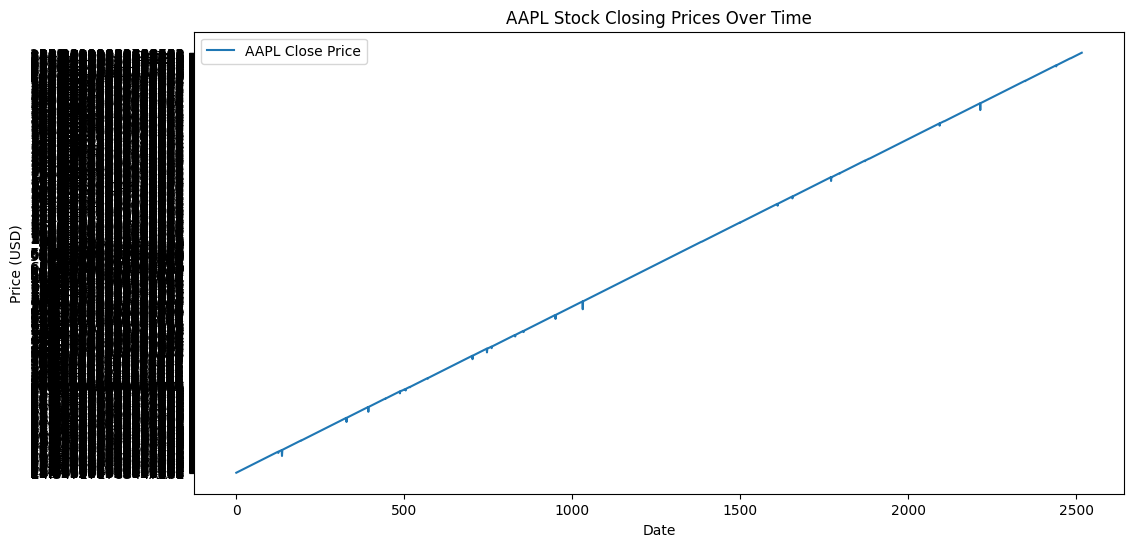

In [9]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f"{ticker} Close Price")
plt.title(f"{ticker} Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### Feature Engineering

In [2]:
# Daily Returns
data['Daily_Return'] = data['Close'].pct_change()


In [ ]:
# Moving Averages (e.g., 20-day, 50-day):

data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


Relative Strength Index (RSI): Use the ta package

In [ ]:
from ta.momentum import RSIIndicator
data['RSI'] = RSIIndicator(data['Close']).rsi()

In [ ]:
data.to_csv('../data/processed_stock_data.csv', index=True)